# Projet Data Mining 
## Imane lahoucik 

# Objectif 
L’objectif est de tester au moins deux méthodes de classification supervisée
pour classer les passagers du Titanic dans la catégorie ”Survivant” ou ”Non
survivant”.
Les données contiennent :
- l’identifiant du passager
- la variable à prédire (”Survivant” = 1 ; ”Non survivant” = 0)
- la classe du billet
- le nom du passager
- le genre
- l’âge
- le nombre de frères / soeurs / conjoints à bord
- le nombre de parents / enfants à bord
- le num´ero du billet
- le tarif passager
- le num´ero de la cabine
- le port d’embarcation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
# Import des librairies
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder #encodage des variables catégorielles
from sklearn.model_selection import train_test_split #la selection des ensemble des modèles d'apprentissage automatique

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score #évaluation des performances des modèles d'apprentissage automatique
from sklearn.model_selection import cross_val_score

# Description des données

In [2]:
# Charger les données depuis un fichier CSV
df = pd.read_csv('Titanic.csv')

In [3]:
df.shape

(891, 12)

In [4]:
# Afficher des informations sur les types de données et les valeurs manquantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Afficher les premières lignes pour avoir un aperçu des données
print(df.head())

#Afficher les dernières lignes pour avoir un aperçu des données
print(df.tail())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [6]:
# Statistiques descriptives pour les variables numériques
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

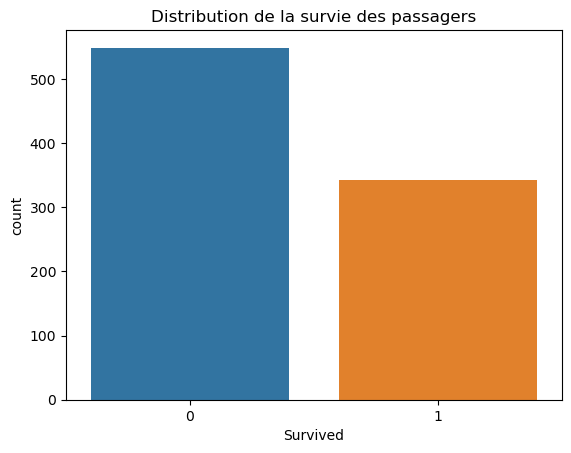

In [8]:
# Visualisation de la distribution de la survie
sns.countplot(x='Survived', data=df)
plt.title('Distribution de la survie des passagers')
plt.show()

In [9]:
df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

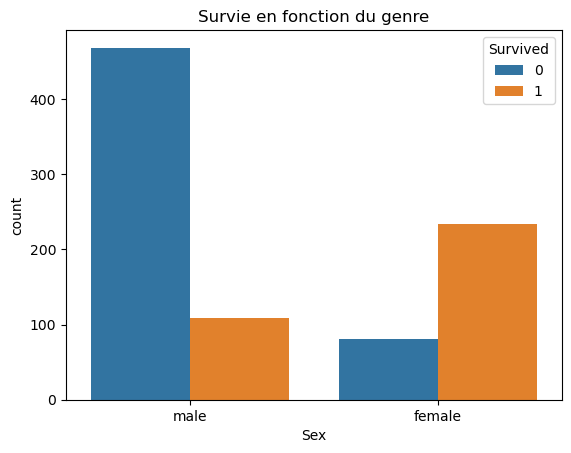

In [10]:
# Visualisation de la corrélation entre le genre et la survie
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survie en fonction du genre')
plt.show()

In [11]:
df.groupby('Age').size()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 88, dtype: int64

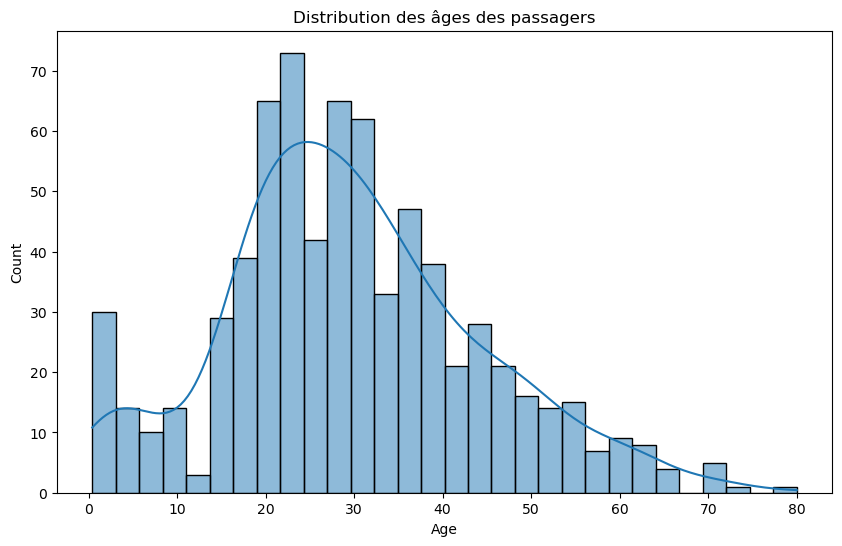

In [12]:
# Visualisation de la distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30) #excluant les NAN, ajouter une estimation de la densité du noyau, spécifier le nombre de bacs dans l'histo
plt.title('Distribution des âges des passagers')
plt.show()

In [13]:
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

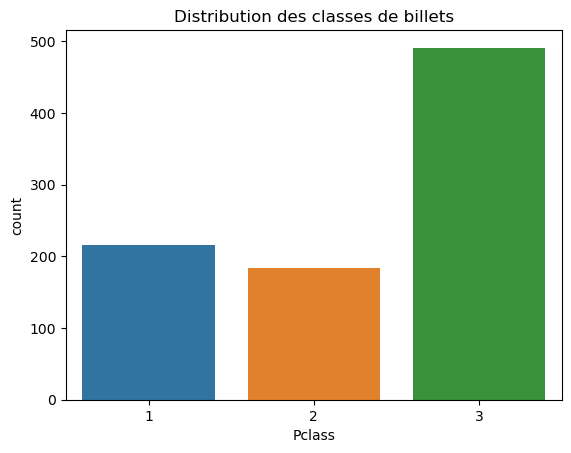

In [14]:
# Visualisation de la distribution des classes de billets
sns.countplot(x='Pclass', data=df)
plt.title('Distribution des classes de billets')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17560\897089162.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


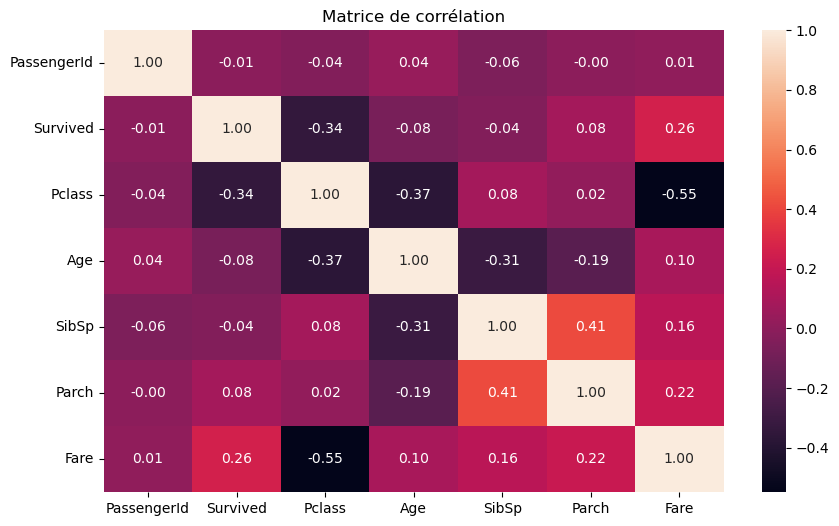

In [15]:
# Carte de chaleur (heatmap) des corrélations entre les caractéristiques numériques
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f") #les annotations(valeurs numériques) activées en format de 2 décimales
plt.title('Matrice de corrélation')
plt.show()

<Figure size 640x480 with 0 Axes>

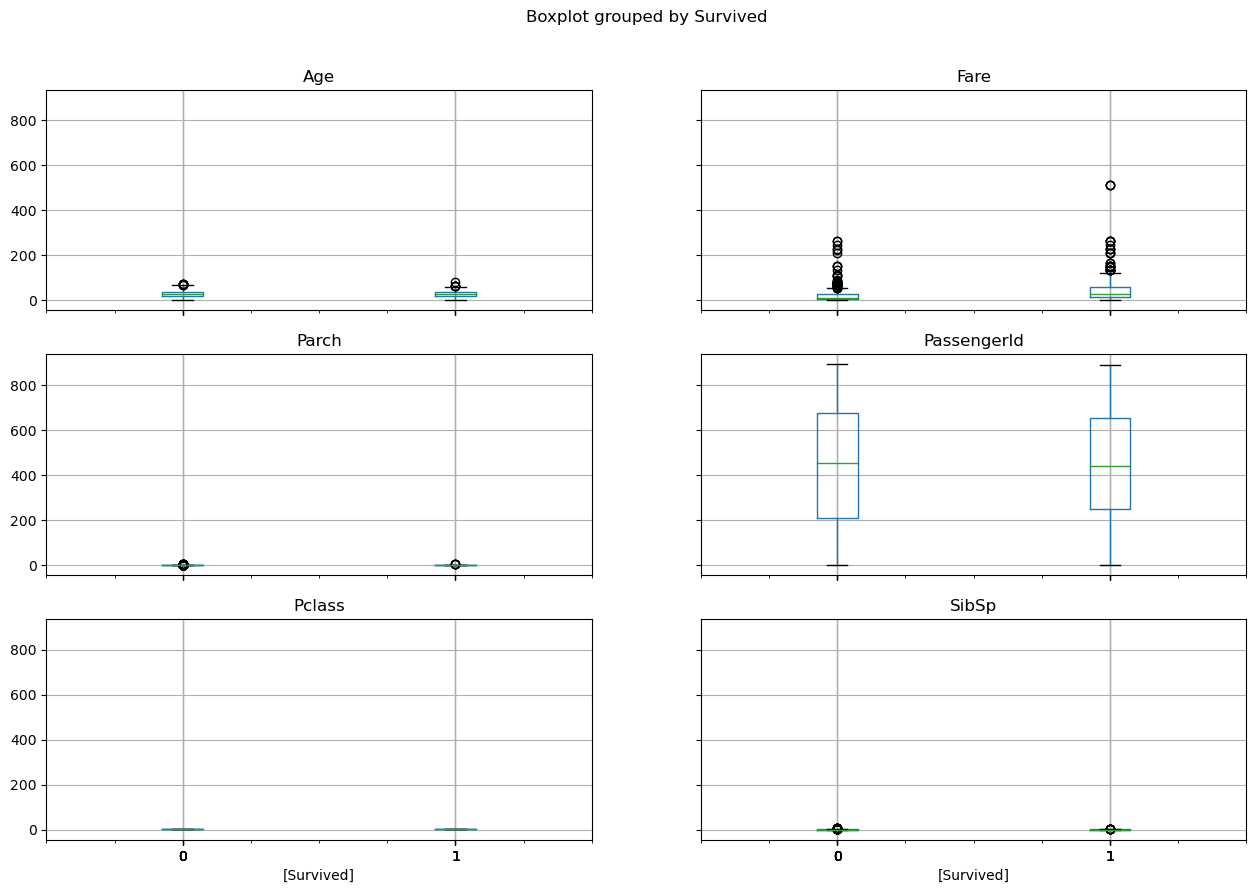

In [16]:
# Visualisation avec boxplot
plt.figure()
df.drop(['Ticket',], axis=1).boxplot(by='Survived', figsize=(15, 10))
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

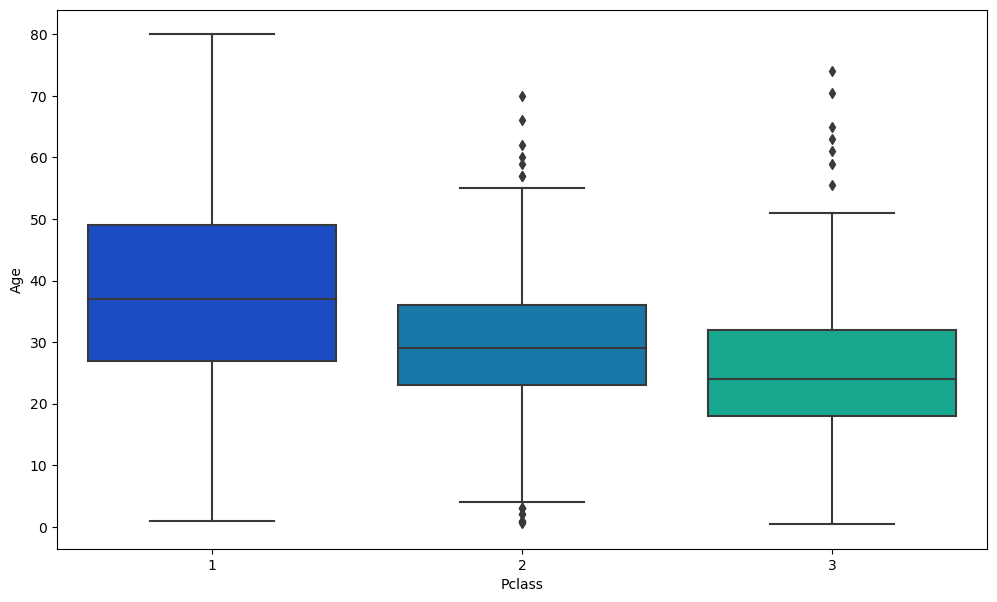

In [17]:
# Visualisation avec boxplot: age moyen par classe
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [18]:
df.groupby(["Pclass"]).Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

# Gestion des valeurs manquantes

In [19]:
# Afficher le nombre de valeurs manquantes par colonne
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##### Gestion des valeurs manquantes pour la variable Age  

In [20]:
#definition de la fonction d'amputation de l'age manquant par la moyenne de la Classe dans laquelle il se trouve

def impute_age (cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

<Axes: >

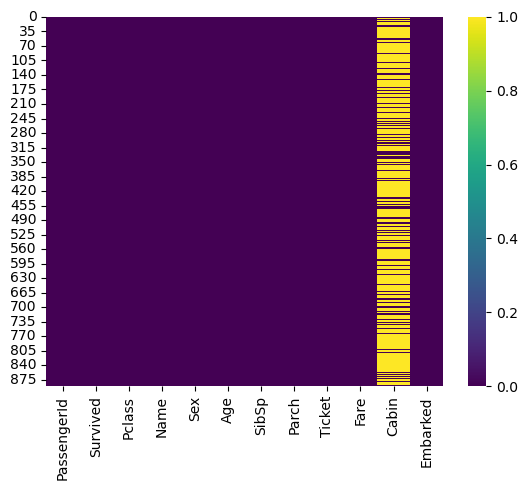

In [21]:
#Application de la fonction à notre base de données
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)
#Verifions le traitement des valeurs manquantes de l'age
sns.heatmap(df.isnull(),cmap='viridis')

In [22]:
# Supprimer les colonnes avec un grand nombre de valeurs manquantes si elles ne sont pas jugées utiles
# la colonne "numéro de la cabine" a beaucoup de valeurs manquantes et n'est pas jugée cruciale pour la prédiction
df = df.drop('Cabin', axis=1)

In [23]:
# Supprimer les lignes contenant au moins une valeur manquantes : dans notre cas, on aura 2 lignes supprimées contenant des valeurs manquantes dans la variable embarked
df.dropna(inplace=True)

In [24]:
# Supprimer les doublons si présents
df = df.drop_duplicates()

In [25]:
# Supprimer des colonnes qui ne sont pas utiles pour la prédiction et qui n'apportent pas d'informations statistiques à notre étude 
#comme le nom et Ticket 
df = df.drop(['Ticket','Name'], axis=1)

In [26]:
# Vérifier à nouveau les informations du DataFrame après nettoyage
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB
None


In [28]:
# Sauvegarder le DataFrame nettoyé dans un nouveau fichier CSV
df.to_csv('Titanic_clean.csv', index=False)

# Pré-traitement des données

##### pour les caractéristiques catégorielles 

In [29]:
# Sélectionner les caractéristiques catégorielles
categorical_features = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']

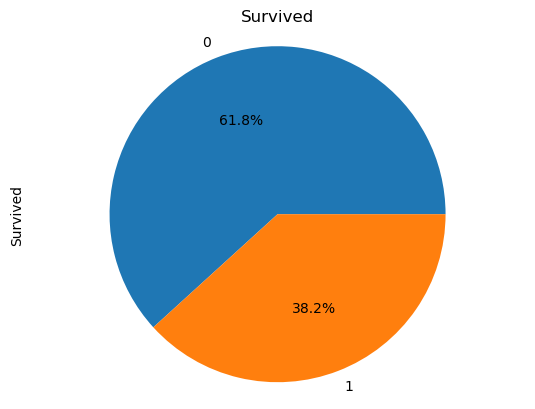

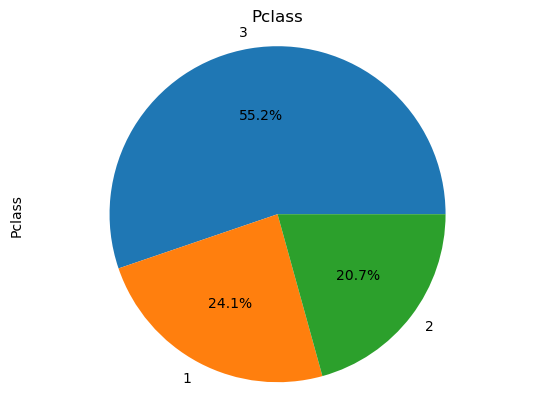

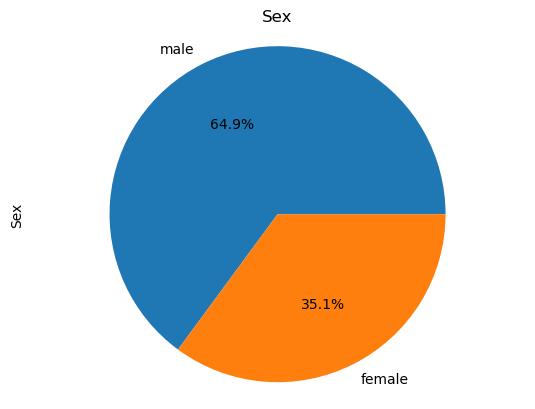

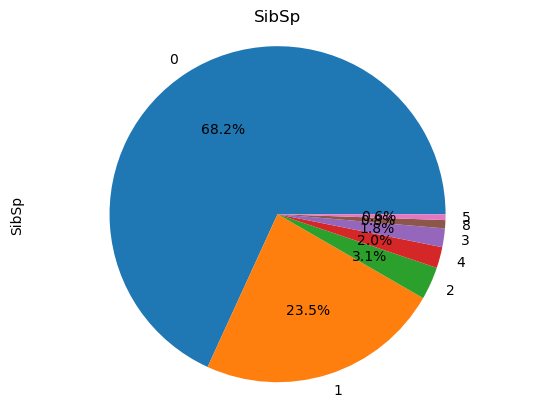

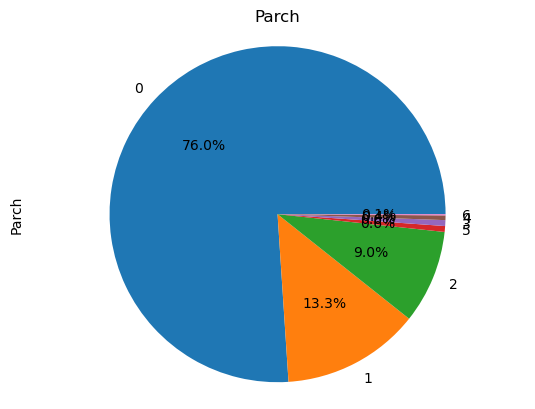

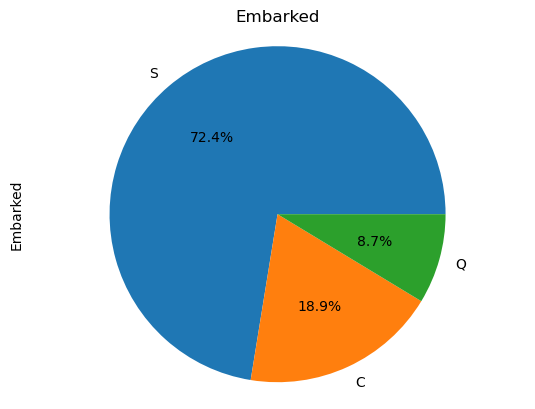

In [30]:
#Générons les pie plot pour chaque variable catégorielles
for var in categorical_features:
    df[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

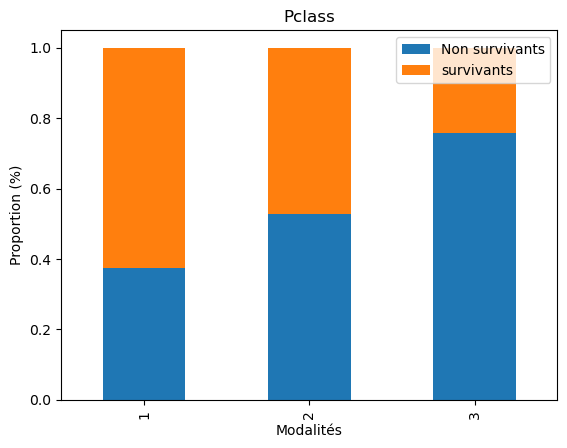

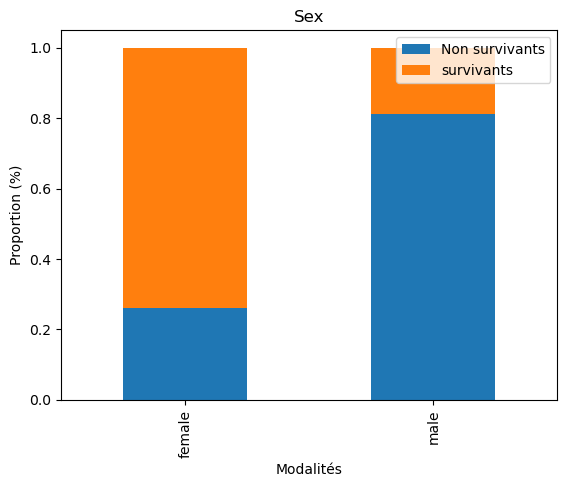

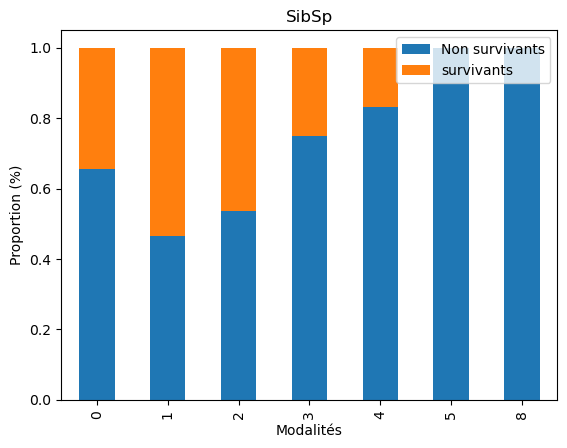

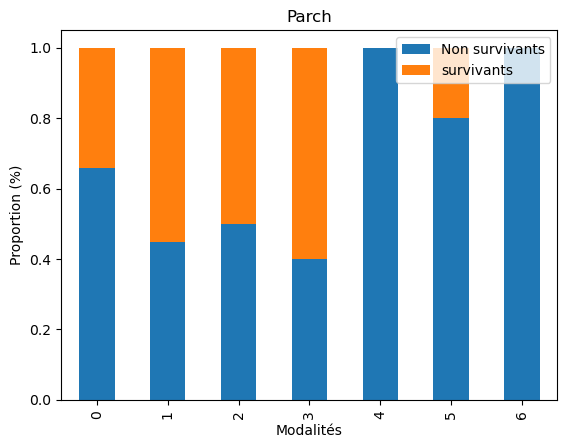

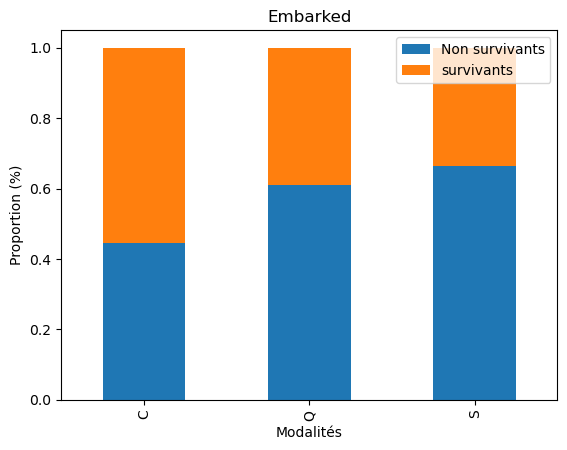

In [31]:
#Analyse bivariée 
categorical_vars=['Pclass','Sex','SibSp','Parch','Embarked']
for var in categorical_vars:
    figsize=(20,20)
    (df.groupby([var,'Survived'])['Survived'].count()/df.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True) #unstack : réorganise les données; stacked= true : graphiques à barres empilées
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['Non survivants', 'survivants'])
    plt.show()

##### Pour les variables numériques  

In [32]:
# Sélectionner des variables numeriques
numerical_features =['Age','Fare']

In [33]:
df["Fare"].max()

512.3292

In [34]:
df["Age"].max()

80.0

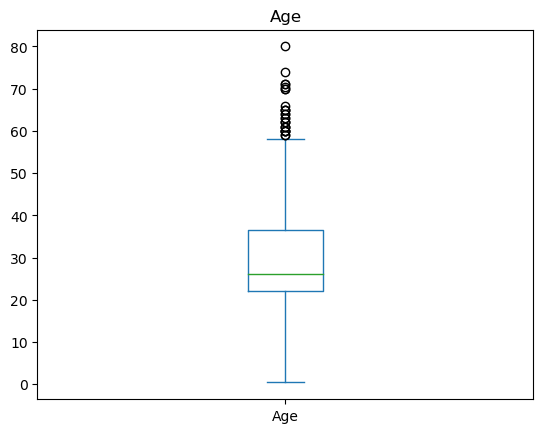

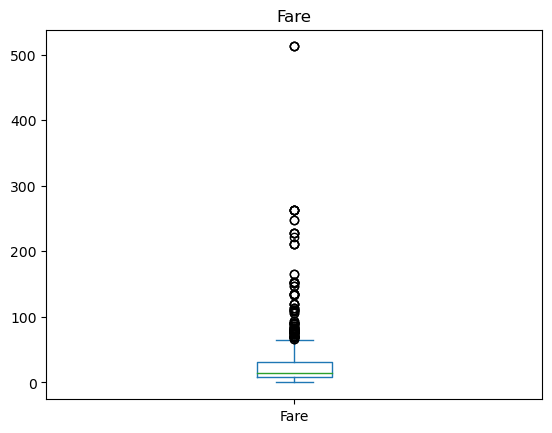

In [35]:
#generons les boxplots des variables numeriques
for var in numerical_features:
    df[var].plot(kind='box')
    plt.title(var)
    plt.show()

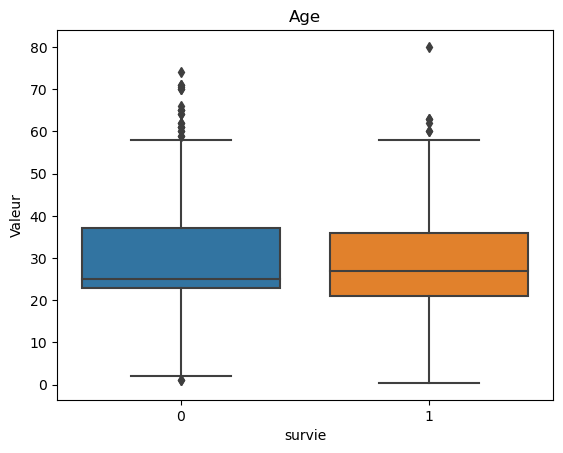

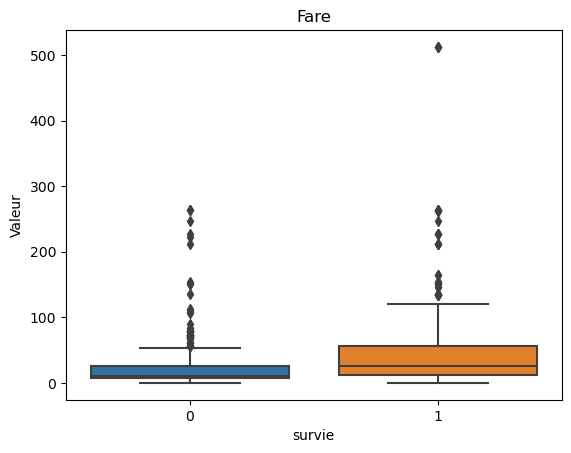

In [36]:
# Générer un box plot pour chaque variable numérique
for var in numerical_features:
    sns.boxplot(x='Survived', y=var, data=df)
    plt.title(var)
    plt.xlabel('survie')
    plt.ylabel('Valeur')
    plt.show()

In [37]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X=df[['Pclass','Sex','SibSp','Parch','Embarked','Fare','Age']]
y=df['Survived']

In [38]:
#Convertissons les variables catégorielles en variables indicatrices (dummies)
X=pd.get_dummies(X,columns=['Pclass','Sex','SibSp','Parch','Embarked'], drop_first=True)

In [39]:
X=sm.add_constant(X)

# Découpage du jeu de données 

In [40]:
# Découpage en bases d’apprentissage et de test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

# Les deux methodes de classification supervisées 

### Méthode de Régression logistique 

In [41]:
# le model de regresssion logistique 
from sklearn.linear_model import LogisticRegression
logit_model = sm.Logit(Y_train, X_train)

In [42]:
# Ajustement du modèle aux données d'apprentissage
result = logit_model.fit()

         Current function value: 0.420917
         Iterations: 35


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      602
Method:                           MLE   Df Model:                           19
Date:                Tue, 20 Feb 2024   Pseudo R-squ.:                  0.3659
Time:                        07:48:19   Log-Likelihood:                -261.81
converged:                      False   LL-Null:                       -412.87
Covariance Type:            nonrobust   LLR p-value:                 7.351e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9660      0.626      6.333      0.000       2.739       5.194
Fare           0.0002      0.003      0.077      0.938      -0.005       0.006
Age           -0.0485      0.011     -4.373      0.0

##### Évaluation du modèle
L'efficacité du modèle est souvent évaluée à l'aide de mesures telles que la précision, la sensibilité, la spécificité.

Le terme "taux de bon classement" (ou accuracy en anglais) en régression logistique fait référence à la proportion d'observations correctement classées par le modèle par rapport au nombre total d'observations. En d'autres termes, c'est la mesure de la précision globale du modèle dans la prédiction des classes.

In [44]:
from sklearn.metrics import confusion_matrix
Y_pred = result.predict(X_test) > 0.5
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[144  19]
 [ 30  74]]


In [45]:
lr_score = accuracy_score(Y_test, Y_pred)
print(lr_score)

0.8164794007490637


La prévision de la survie des passagers lors du naufrage du Titanic est réalisée de manière très efficace grâce au modèle de régression logistique.

### Random forest

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


tree = DecisionTreeClassifier(random_state=50)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=50)

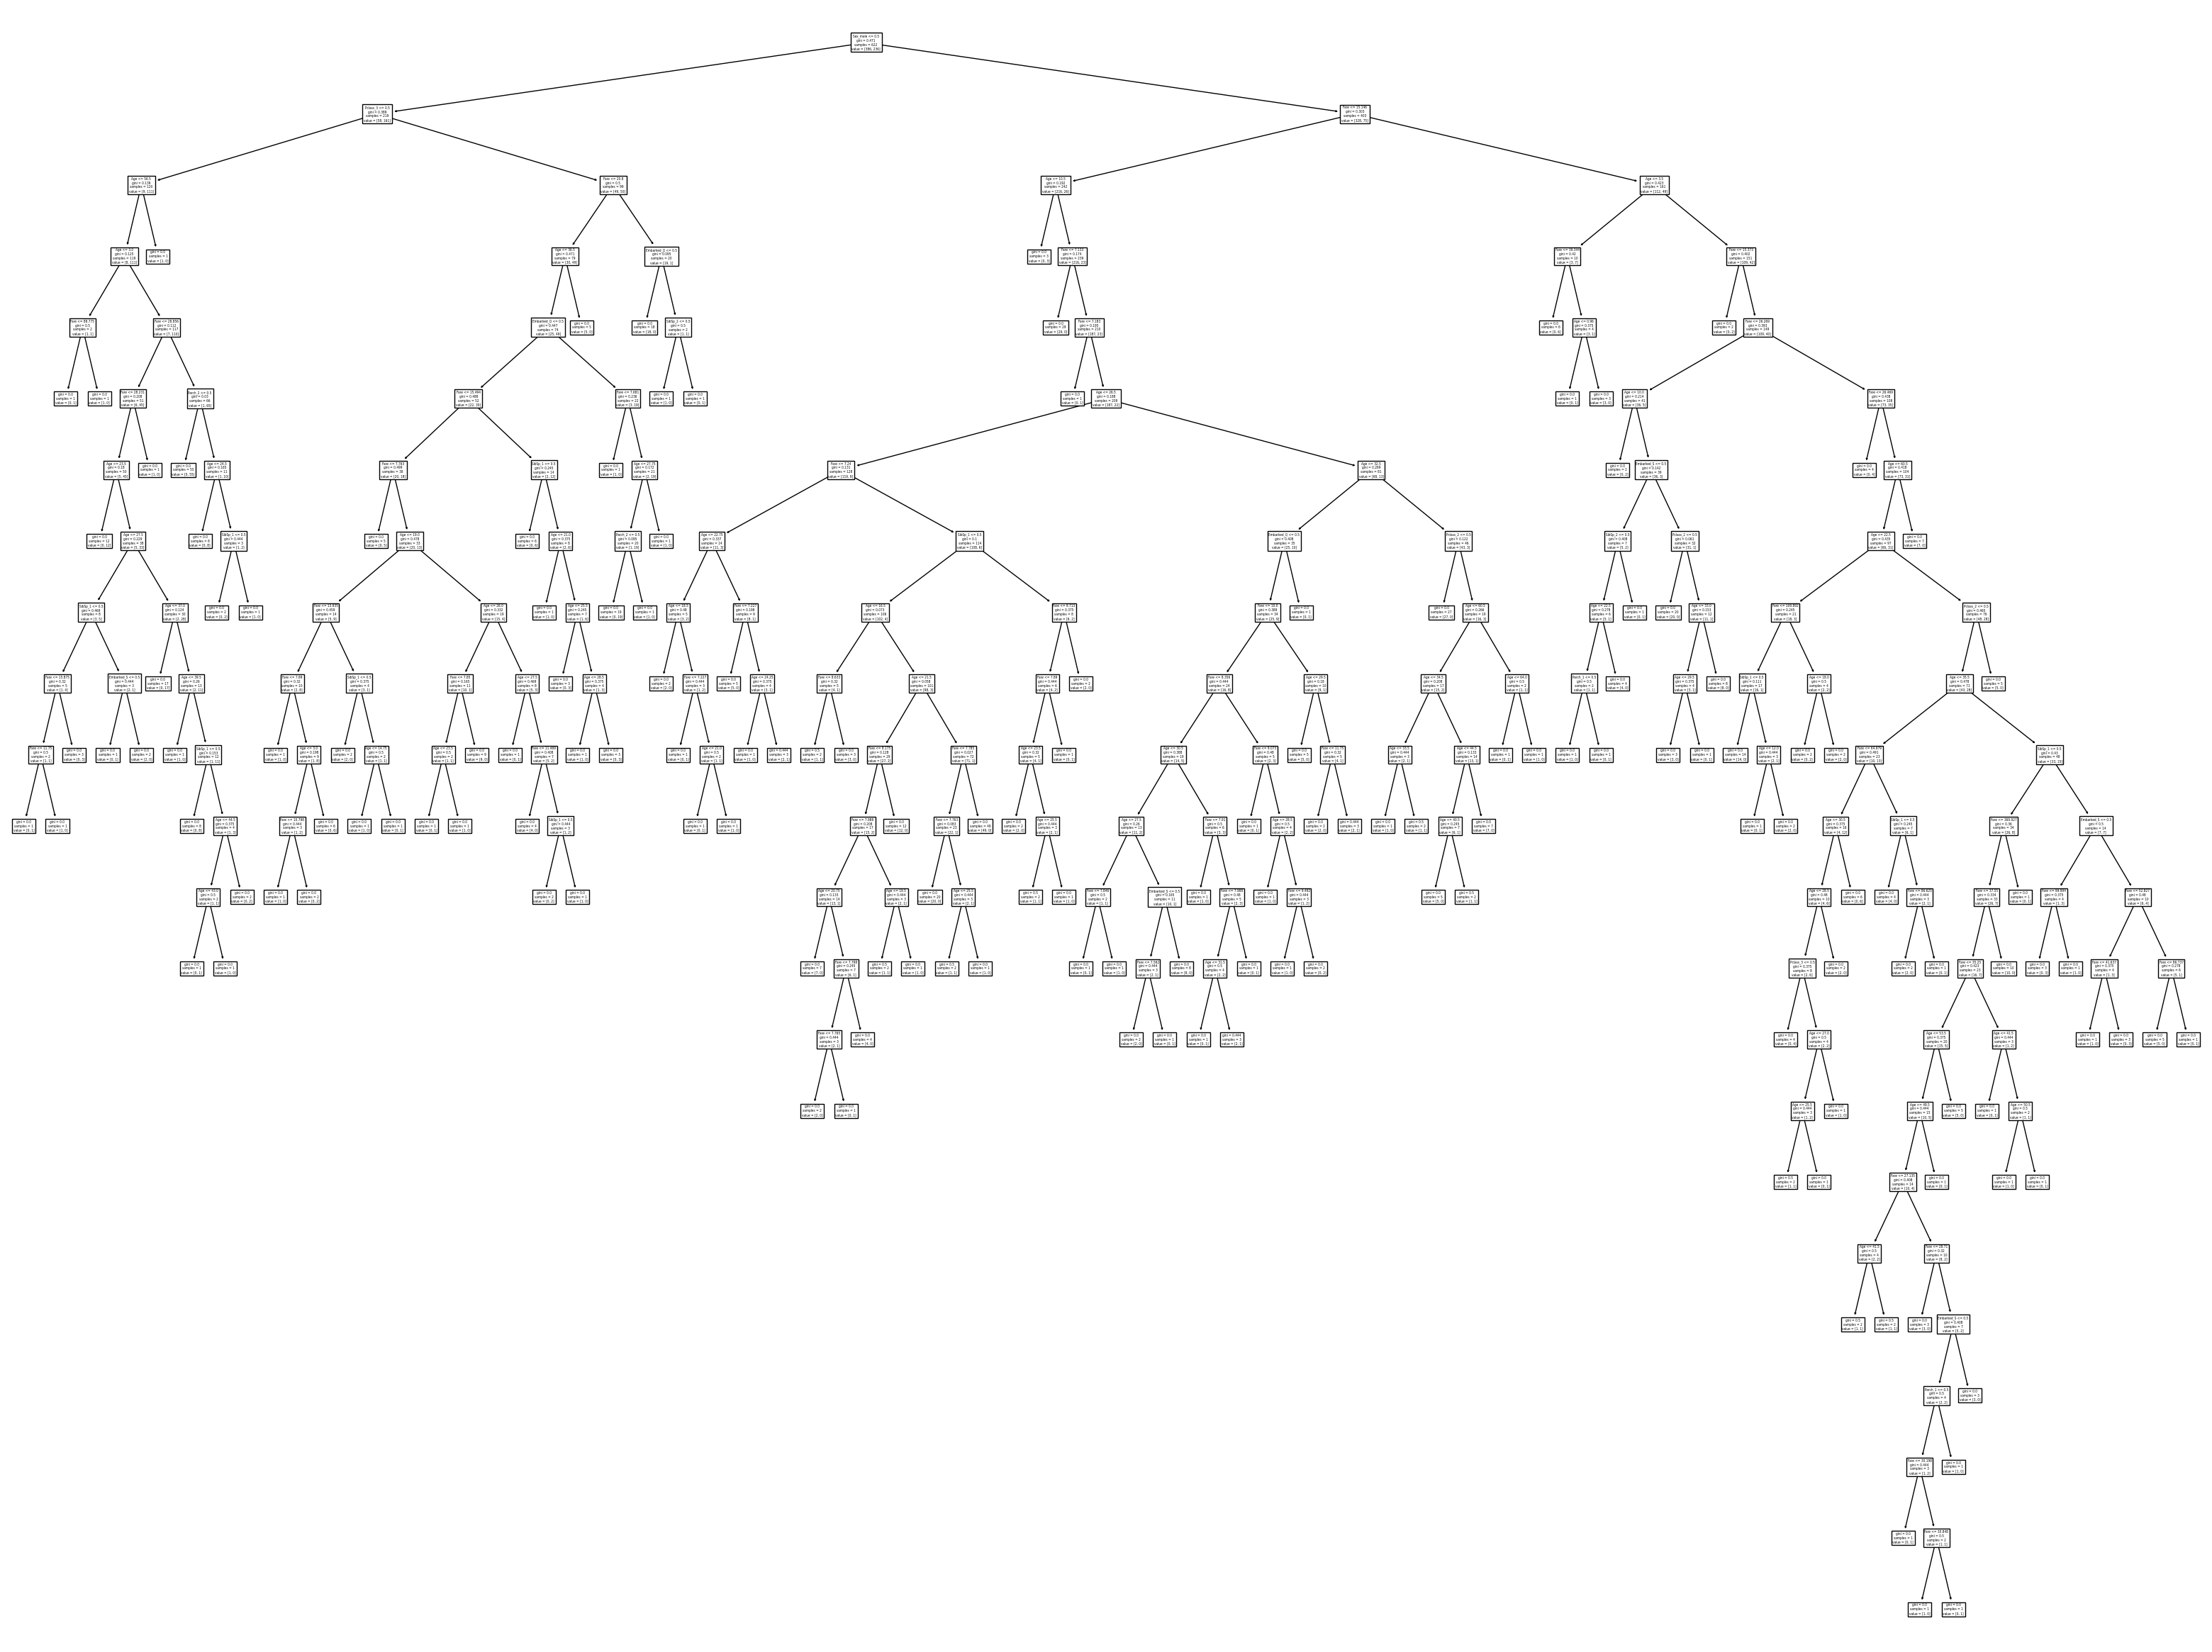

In [47]:
plt.figure(figsize=(40,30))
plot_tree(tree, feature_names=X.columns.tolist())  # Convertir l'Index en une liste avec tolist()
plt.show()

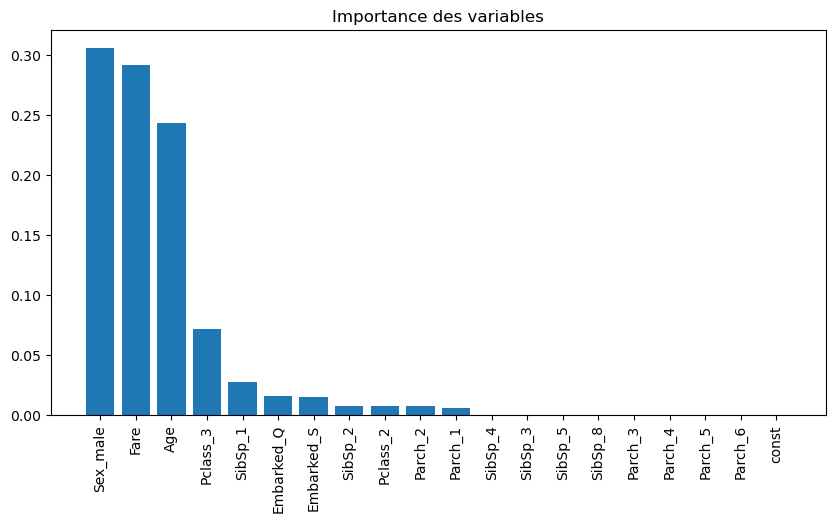

In [48]:
# Affichage de l'importance des variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

#### Construction du modèle optimisé d'arbre

L'optimisation de l'arbre de décision implique la recherche des paramètres optimaux qui garantissent la généralisation efficace du modèle sur de nouvelles données. 

Les paramètres suivants peuvent être optimisés pour l'arbre de décision :

* criterion : le critère de sélection des attributs. Les critères pris en charge sont "gini" pour l'indice de Gini et "entropy" pour le gain d'information.

* splitter : la stratégie de division des nœuds. Les stratégies prises en charge sont "best" pour choisir la meilleure division et "random" pour choisir une division aléatoire.

* max_depth : la profondeur maximale de l'arbre. Si None, les nœuds sont étendus jusqu'à ce que toutes les feuilles contiennent moins d'échantillons que min_samples_split. Une profondeur maximale élevée peut entraîner du surajustement, tandis qu'une profondeur basse peut entraîner du sous-ajustement.


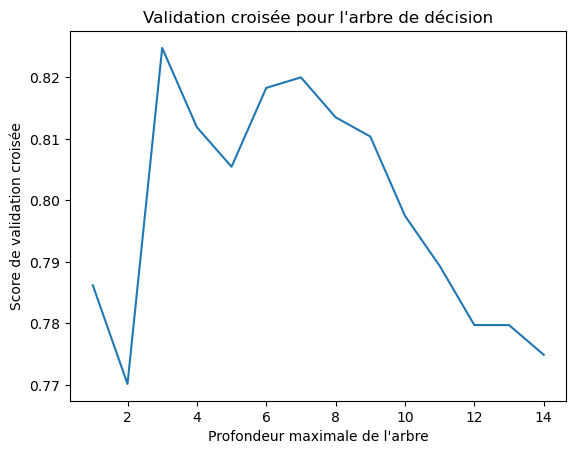

In [51]:
# Liste des profondeurs maximales à tester
maxi_depths = range(1, 15)

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in maxi_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, Y_train, cv=10)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal
plt.plot(maxi_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()

In [53]:
# Trouver la profondeur maximale qui donne le meilleur score de validation croisée
best_depth = maxi_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)

La meilleure profondeur maximale est : 3


In [55]:
# Construire l'arbre de décision avec la profondeur maximale choisie
tree = DecisionTreeClassifier(max_depth=3, random_state=50)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

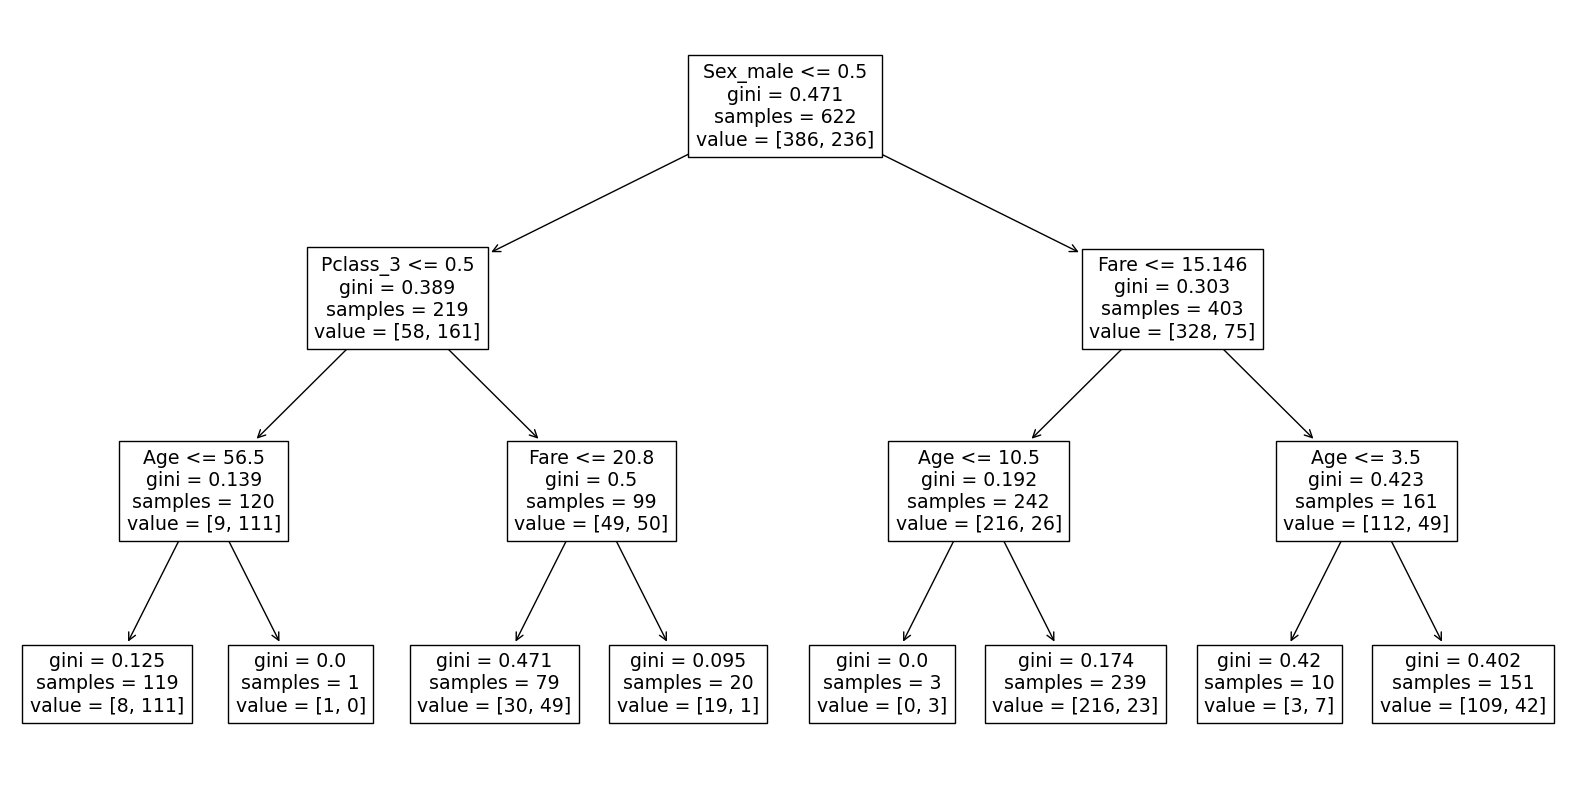

In [56]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns.tolist())
plt.show()

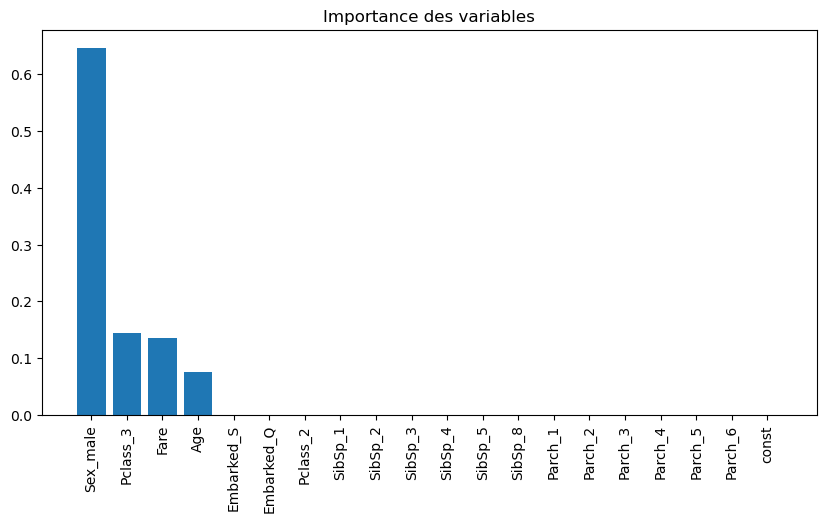

In [57]:
# Affichage de l'importance des variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

##### Mesurer le performance de l'arbre

In [58]:
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble d'entraînement
Y_train_pred = tree.predict(X_train)
Y_train_prob = tree.predict_proba(X_train)[:, 1]

# Prédictions sur l'ensemble de test
Y_test_pred = tree.predict(X_test)
Y_test_prob = tree.predict_proba(X_test)[:, 1]

In [59]:
print(accuracy_score(Y_test, Y_test_pred))

0.7865168539325843


# Conclusion:  Comparaison des 2 méthodes